Unit 7, Lecture 1
====

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, February 22, 2016

In [3]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, erf
import scipy.stats
import numpy.linalg
plt.style.use(['ggplot', '../../che116.mplstyle'])

Working with Matrices in Numpy
====

We saw earlier in the class how to create numpy matrices. Let's review that and learn about explicit initialization

Explicit Initialization
----

You can explitily set the values in your matrix by first creating a list and then converting it into a numpy array

In [2]:
matrix = [ [4,3], [6, 2] ]
print('As Python list:')
print(matrix)

np_matrix = np.array(matrix)

print('The shape of the array:', np.shape(np_matrix))
print('The numpy matrix/array:')
print(np_matrix)

As Python list:
[[4, 3], [6, 2]]
The shape of the array: (2, 2)
The numpy matrix/array:
[[4 3]
 [6 2]]


You can use backslashes, `\`, to specify multiple lines in python. This can make the formatting cleaner

In [3]:
np_matrix_2 = np.array([\
                        [4,3],   \
                        [1, 2],  \
                        [-1, 4], \
                        [4, 2]   \
                        ])
print np_matrix_2

[[ 4  3]
 [ 1  2]
 [-1  4]
 [ 4  2]]


Create and Set
----

You can also create an array and then set the elements.

In [4]:
np_matrix_3 = np.zeros( (2, 10) )

print np_matrix_3

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [5]:
np_matrix_3[:, 1] = 2
print np_matrix_3

[[ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [6]:
np_matrix_3[0, :] = -1
print np_matrix_3

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [7]:
np_matrix_3[1, 6] = 43
print np_matrix_3

[[ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.   2.   0.   0.   0.   0.  43.   0.   0.   0.]]


In [8]:
rows, columns = np.shape(np_matrix_3) #get the number of rows and columns
for i in range(columns): #Do a for loop over columns
    np_matrix_3[1, i] = i ** 2 #Set the value of the 2nd row, ith column to be i^2
    
print np_matrix_3

[[ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.   1.   4.   9.  16.  25.  36.  49.  64.  81.]]


Linear Algebra
====

The linear algebra routines for python are in the `numpy.linalg` library. [See here](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html)

Matrix Multiplication
---

Matrix multiplication is done with the `dot` method. Let's compare that with `*`

In [9]:
np_matrix_1 = np.random.random( (2, 4) ) #create a random 2 x 4 array
np_matrix_2 = np.random.random( (4, 1) ) #create a random 4 x 1 array

print np_matrix_1.dot(np_matrix_2)

[[ 0.66777056]
 [ 1.18273913]]


So, dot correctly gives us a 2x1 matrix as expected for the two shapes

In [10]:
print np_matrix_1 * np_matrix_2

ValueError: operands could not be broadcast together with shapes (2,4) (4,1) 

The element-by-element multiplication, `*`, doesn't work on different sized arrays.

Method vs Function
----

Instead of using `dot` as a method (it comes after a `.`), you can use the `dot` function as well. Let's see an example:

In [11]:
print np_matrix_1.dot(np_matrix_2)

print np.dot(np_matrix_1, np_matrix_2)

[[ 0.66777056]
 [ 1.18273913]]
[[ 0.66777056]
 [ 1.18273913]]


Matrix Rank
----

The rank of a matrix can be found with singular value decomposition. In numpy, we can do this simply with a call to `linalg.matrix_rank`

In [12]:
import numpy.linalg as linalg

matrix =  [ [1, 0], [0, 0] ]
np_matrix = np.array(matrix)

print linalg.matrix_rank(np_matrix)



1


Matrix Inverse
---

The inverse of a matrix can be found using the `linalg.inverse` command. Consider the following system of equations:

$$\begin{array}{lr}
3 x + 2 y + z & = 5\\
2 x - y & = 4 \\
x + y - 2z & = 12 \\
\end{array}$$

We can encode it as a matrix equation:

$$\left[\begin{array}{lcr}
3 & 2 & 1\\
2 & -1 & 0\\
1 & 1 & -2\\
\end{array}\right]
\left[\begin{array}{l}
x\\
y\\
z\\
\end{array}\right]
=
\left[\begin{array}{l}
5\\
4\\
12\\
\end{array}\right]$$

$$\mathbf{A}\mathbf{x} = \mathbf{b}$$

$$\mathbf{A}^{-1}\mathbf{b} = \mathbf{x}$$

In [13]:

#Enter the data as lists
a_matrix = [[3, 2, 1],\
            [2,-1,0],\
            [1,1,-2]]
b_matrix = [5, 4, 12]

#convert them to numpy arrays/matrices
np_a_matrix = np.array(a_matrix)
np_b_matrix = np.array(b_matrix).transpose()

#Solve the problem
np_a_inv = linalg.inv(np_a_matrix)
np_x_matrix = np_a_inv.dot(np_b_matrix)

#print the solution
print np_x_matrix

#check to make sure the answer works
print np_a_matrix.dot(np_x_matrix)

[ 2.47058824  0.94117647 -4.29411765]
[  5.   4.  12.]


Computation cost for inverse
---

Computing a matrix inverse can be VERY expensive for large matrices. Do not exceed about 500 x 500 matrices

In [14]:
linalg.inv(np.random.random( (500, 500) ))

array([[ 0.29700354,  0.85766577, -0.65783089, ..., -0.39640122,
         0.36874753, -0.51949538],
       [ 0.15432558,  0.83528842, -0.30763506, ...,  0.26710179,
         0.23252627, -0.49853606],
       [ 0.04683034,  1.62699702, -0.95698279, ...,  0.71928824,
         0.31228036, -1.25207126],
       ..., 
       [ 0.70994687,  2.55299285, -0.6463384 , ...,  0.38213018,
         0.7282935 , -1.6642954 ],
       [ 0.31343546,  1.28323781, -0.66981731, ..., -0.1445187 ,
         0.34514419, -0.88028262],
       [ 0.21774295,  0.713071  , -0.04796278, ..., -0.1998639 ,
         0.19612244, -0.36811705]])

Eigenvectors/Eigenvalues
----

Before trying to understand what an eigenvector is, let's try to understand their analogue, a stationary point.

Consider this process:

1. You start with $$x_1 = 1$$

2. You set $$x_2 = \frac{x_1^2 - 612}{2x_1}$$

3. You set $$x_3 = \frac{x_2^2 - 612}{2x_2}$$


$$x_{n+1} = f(x_n)$$

Is there an $x$ such that $x = f(x)$?

In [9]:
x = 1
for i in range(10):
    x = x - (x**2 - 612) / (2 * x)
    print(i, x)

0 306.5
1 154.2483686786297
2 79.10799786435472
3 43.42212868215148
4 28.758162428779126
5 25.019538536995714
6 24.74021067122501
7 24.738633803961573
8 24.738633753705965
9 24.73863375370596


This is called a **stationary point**

Eigenvectors/Eigenvalues
----

Matrices are analogues of functions. They take in a vector and return a vector.
$$\mathbf{A}\mathbf{x} = \mathbf{y}$$

Just like stationary points, there is sometimes a special vector which has this property:

$$\mathbf{A}\mathbf{x} = \mathbf{x}$$

Such a vector is called an **eigenvector**. It turns out such vectors are quite rare. If we instead allow a scalar, we can find a whole bunch like this:

$$\mathbf{A}\mathbf{v} =\lambda\mathbf{v}$$

These are like the stationary points above, except we are getting back our input times a constant. That means it's a particular *direction* that is unchanged, not the value. 

Finding Eigenvectors/Eigenvalues
---

Eigenvalues/eigenvectors can be found easily as well in python, including for complex numbers and sparse matrices. The command `linalg.eigh` will return only the real eigenvalues/eigenvectors. That assumes your matrix is Hermitian (real eigenvalues). Use `eig` to get general possibly complex eigenvalues Here's an easy example:

Let's consider this matrix: 

$$
A = \left[\begin{array}{lr}
3 & 1\\
1 & 3\\
\end{array}\right]$$

Imagine it as a geometry operator. It takes in a 2D vector and morphs it into another 2D vector.

$$\vec{x} = [1, 0]$$

$$A \,\vec{x}^T = [3, 1]^T$$

Now is there a particular *direction* where $\mathbf{A}$ cannot affect it?

In [44]:
A = np.array([[3,1], [1,3]])

e_values, e_vectors = np.linalg.eig(A)

print(e_vectors)
print(e_values)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[ 4.  2.]


So that means $v_1 = [0.7, 0.7]$ and $v_2 = [-0.7, 0.7]$. Let's find out:

In [43]:
v1 = e_vectors[:,0]
v2 = e_vectors[:,1]

A.dot(v1)

array([ 2.82842712,  2.82842712])

Yes, that is the same direction! And notice that it's 4 times as much as the input vector, which is what the eigenvalue is telling us.

A random matrix will almost never be Hermitian, so look out for complex numbers. In engineering, your matrices will almost always be Hermitian

In [21]:
e_values, e_vectors = linalg.eig(A)
print e_values
print e_vectors


[ 2.88080198+0.j         -0.82984034+0.j          0.09012821+0.10005843j
  0.09012821-0.10005843j  0.52389887+0.j        ]
[[ -4.72026346e-01+0.j          -7.57452945e-01+0.j
   -1.40248654e-01+0.06634768j  -1.40248654e-01-0.06634768j
    3.93017322e-03+0.j        ]
 [ -5.80564557e-01+0.j           2.13097276e-01+0.j
    2.63354271e-01-0.01943782j   2.63354271e-01+0.01943782j
   -6.24559999e-01+0.j        ]
 [ -3.60702674e-01+0.j           2.83882447e-04+0.j
   -3.71864697e-01-0.10603109j  -3.71864697e-01+0.10603109j
    5.26108378e-01+0.j        ]
 [ -4.08258817e-01+0.j          -2.62929420e-02+0.j           7.28252111e-01+0.j
    7.28252111e-01-0.j          -4.57431712e-01+0.j        ]
 [ -3.78621504e-01+0.j           6.16573749e-01+0.j
   -4.69714269e-01+0.07540837j  -4.69714269e-01-0.07540837j
    3.51959606e-01+0.j        ]]


Notice that there are compelx eigenvalues, so `eigh` was not correct to use

Interaction
---

You can create interactive objects in ipython notebooks using the `widgets` package! There are three main widgets:

1. Buttons
2. Text
3. Sliders

In [40]:
from ipywidgets import widgets #these are the widgets
from IPython import display #this allows us to show things

Buttons
---

In [41]:
button = widgets.Button(description='Click ヽ(ಠ▃ಠ)ﾉ Click')
display.display(button)

To make the button do something, you have to give it a function name.

In [9]:
#your function has to take one argument - the button.
#You don't have to do anything with it
def plot_a_line(b):
    x = np.arange(0,10,1)
    y = x**2
    plt.plot(x,y)
    plt.show()

In [42]:
button = widgets.Button(description='Plot ヽ(ಠ▃ಠ)ﾉ Plot')
button.on_click(plot_a_line) #just give the name of your function
display.display(button)

Text
----

Instead of a button, you can have a text box

In [12]:
text_input = widgets.Text('What is your name?')
display.display(text_input)

well that's kind of useless. What can we do with that?

In [26]:
text_input.value

'Andrew'

In [30]:
#import square root
from math import sqrt

#remember a function which we attach to a button needs to take in a button variable
def compute_square_root(b):
    number = float(text_input.value)
    print('the square root of {} is {}'.format(number, sqrt(number)))

In [31]:
text_input = widgets.Text('4')
display.display(text_input)
button = widgets.Button(description='What is the square root?')
button.on_click(compute_square_root)
display.display(button)

the square root of 4.0 is 2.0
the square root of 5.0 is 2.23606797749979
the square root of 8.0 is 2.8284271247461903


Formatting LaTeX
---

Now that is great and all, but it's not nice to have so many lines and we'd like to use some LaTeX in there

In [32]:
my_latex = display.Latex('$\sqrt{4} = 2$')
display.display(my_latex)

<IPython.core.display.Latex object>

OK, but how do we do string formatt? LaTeX already uses curly braces.

In [33]:
display.display(display.Latex('$\sqrt{4} = {}$'.format(2)))

IndexError: tuple index out of range

We fix this by using two curly braces when we really mean curly braces and one set when we want to do string formatting

In [34]:
display.display(display.Latex('$\sqrt{{4}} = {}$'.format(2)))

<IPython.core.display.Latex object>

In [35]:
display.display(display.Latex('$\sqrt{{ {} }} = {}$'.format(4, 2)))

<IPython.core.display.Latex object>

OK, that makes nicer output, but how do we prevent multiple lines from being printed?

In [43]:
my_latex = Latex('$\sqrt{4} = 2$')
display.display(my_latex)
display.clear_output()

So we can clear everything! Clear output WILL NOT remove buttons or other widgets. Let's put it all together now:

In [53]:
def compute_square_root(b):
    '''This will compute the square root of the contents of the text box'''
    number = float(text_input.value)
    display.clear_output()
    display.display(display.Latex('$\sqrt{{ {} }} = {}$'.format(number, sqrt(number))))

#build our widgets
text_input = widgets.Text('4')
button = widgets.Button(description='What is the square root?')
button.on_click(compute_square_root)

#finally, we use our clear_and_build to start off
display.display(text_input)
display.display(button)   

<IPython.core.display.Latex object>

Interact
----

The interact widget is a wonderful little tool if you want to explore changing a number. It takes care of clearing the output for you as well!

In [60]:
def compute_square_root(x):
    '''This will compute the square root of the given argument'''
    display.display(display.Latex('$\sqrt{{ {} }} = {}$'.format(x, sqrt(x))))

In [61]:
square_i = widgets.interact(compute_square_root, x=4)

<IPython.core.display.Latex object>

Since you don't want square roots of negative numbers, you can specify information about your slider

In [63]:
square_i = widgets.interact(compute_square_root, x=(0,5,1))

<IPython.core.display.Latex object>

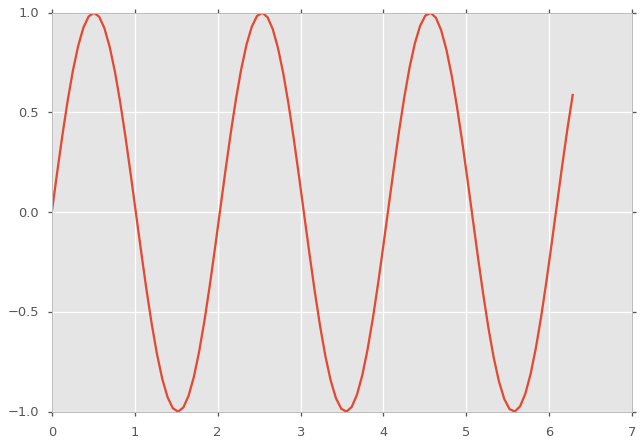

In [73]:
from math import pi
def plot_sine(freq):
    x = np.linspace(0, 2 * pi, 100)
    y = np.sin(freq * x)
    plt.plot(x,y)
    plt.show()

widgets.interact(plot_sine, freq=(0.1, 10,1))

You'll notice with a plot it's quite slow. That's because it's replotting each time! You can improve this, but the easiest thing is to make sure your step-size isn't too small in both the plot and the slider

Interactive Plots
----

Try using:

    %matplotlib notebook

instea of

    %matplotlib inline

in your notebooks to enable interaction with your graphs as well.

<IPython.core.display.Javascript object>


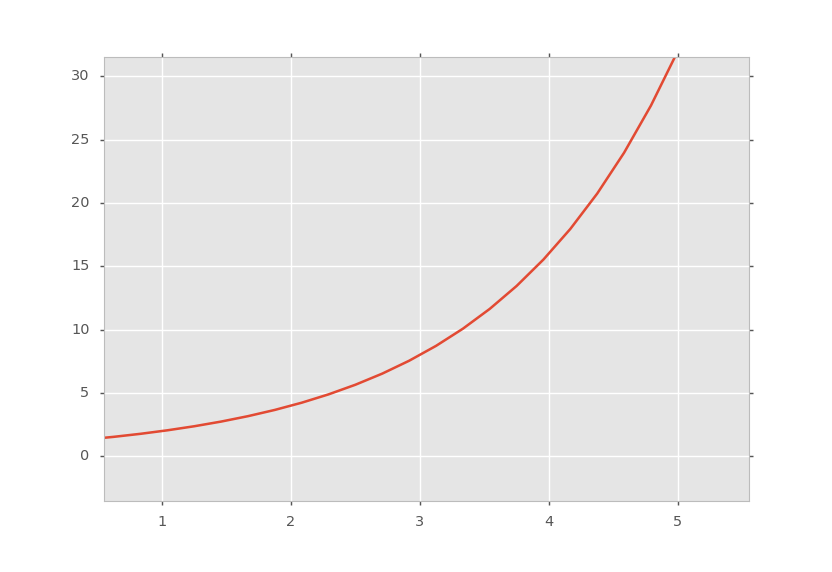

In [75]:
%matplotlib notebook

x = np.linspace(0,5,25)
y = 2**x
plt.plot(x,y)
plt.show()

In [ ]:
%system jupyter nbconvert --to slides --post serve Unit_7_Lecture_1.ipynb